Se obtuvieron dos indicadores importantes a nivel macroeconómico de India mediante la API del Data Bank del Banco Mundial. Debido a restricciones de solicitud, se recopilaron dos indicadores clave en lugar de más de 100 filas de datos. Estos indicadores son relevantes para el proyecto de Home Credit.

El primero de ellos es la tasa de interés real, que desempeña un papel crucial al evaluar la propensión de las personas y entidades a solicitar créditos. Una tasa de interés real más alta puede influir en la decisión de una persona o entidad para buscar financiamiento, ya que afecta directamente los costos de endeudamiento.

El segundo indicador es la proporción de créditos otorgados al sector privado en relación con la tasa monetaria. Esta métrica nos brinda información valiosa sobre si Home Credit ha proporcionado financiamiento y liquidez para el crecimiento y desarrollo de las empresas en India. Esta relación también puede estar correlacionada con el empleo de los prestatarios, ya que un mayor acceso al crédito puede fomentar la expansión y creación de empleo en el sector privado.

Estos indicadores son de gran relevancia para el análisis y evaluación de las condiciones económicas y el impacto de Home Credit en el entorno financiero de India.

In [1]:
import json
import  pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
tasa_interes_real_anual_india = requests.get('https://api.worldbank.org/v2/country/IN/indicator/FR.INR.RINR?format=json')

In [3]:
creditos_sector_privado_como_porcentaje_tasa_monetaria_india = requests.get('https://api.worldbank.org/v2/country/IN/indicator/FD.AST.PRVT.GD.ZS?format=json')

In [4]:
print(tasa_interes_real_anual_india.text)

[{"page":1,"pages":2,"per_page":50,"total":63,"sourceid":"2","lastupdated":"2023-06-29"},[{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2022","value":0.229815062339361,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2021","value":0.147236063271482,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2020","value":4.2039104030298,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"IN","value":"India"},"countryiso3code":"IND","date":"2019","value":6.89487542729716,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id

In [5]:
respuesta1 = json.loads(tasa_interes_real_anual_india.text)

In [6]:
respuesta2 = json.loads(creditos_sector_privado_como_porcentaje_tasa_monetaria_india.text)

In [7]:
metadatos1, datos1 = respuesta1[0], respuesta1[1]
metadatos2, datos2 = respuesta2[0], respuesta2[1]


In [8]:
df_tasa_real_int = pd.DataFrame.from_dict(datos1)
df_creditos = pd.DataFrame.from_dict(datos2)

In [9]:
df_tasa_real_int.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2022,0.229815,,,1
1,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2021,0.147236,,,1
2,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2020,4.203910,,,1
3,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2019,6.894875,,,1
4,"{'id': 'FR.INR.RINR', 'value': 'Real interest ...","{'id': 'IN', 'value': 'India'}",IND,2018,5.361666,,,1


In [10]:
df_creditos.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2022,NaN,,,1
1,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2021,50.412164,,,1
2,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2020,54.571722,,,1
3,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2019,50.742462,,,1
4,"{'id': 'FD.AST.PRVT.GD.ZS', 'value': 'Domestic...","{'id': 'IN', 'value': 'India'}",IND,2018,50.338163,,,1


In [11]:
df_tasa_real_int['indicator'] = 'Real interest rate (%)'
df_tasa_real_int['country'] = 'India'
df_tasa_real_int = df_tasa_real_int.rename(columns={'countryiso3code': 'country_code', 'value': 'real_interest_rate', 'indicator':'indicator_real_int'})

In [12]:
df_creditos['indicator'] = 'Domestic credit to private sector by banks (% of GDP)'
df_creditos['country'] = 'India'
df_creditos = df_creditos.rename(columns={'countryiso3code': 'country_code', 'value': 'credit_to_private_sector', 'indicator':'indicator_credit'})

In [13]:
df = df_tasa_real_int.merge(df_creditos, how='left', on='date', suffixes=('', '_drop'))
df = df.loc[:,~df.columns.str.endswith('_drop')]

In [14]:
column_order = ['date', 'country_code', 'country', 'indicator_real_int', 'real_interest_rate', 'indicator_credit', 'credit_to_private_sector']
df = df[column_order]

In [15]:
df.head()

,date,country_code,country,indicator_real_int,real_interest_rate,indicator_credit,credit_to_private_sector
0,2022,IND,India,Real interest rate (%),0.229815,Domestic credit to private sector by banks (% ...,NaN
1,2021,IND,India,Real interest rate (%),0.147236,Domestic credit to private sector by banks (% ...,50.412164
2,2020,IND,India,Real interest rate (%),4.203910,Domestic credit to private sector by banks (% ...,54.571722
3,2019,IND,India,Real interest rate (%),6.894875,Domestic credit to private sector by banks (% ...,50.742462
4,2018,IND,India,Real interest rate (%),5.361666,Domestic credit to private sector by banks (% ...,50.338163


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      50 non-null     object 
 1   country_code              50 non-null     object 
 2   country                   50 non-null     object 
 3   indicator_real_int        50 non-null     object 
 4   real_interest_rate        45 non-null     float64
 5   indicator_credit          50 non-null     object 
 6   credit_to_private_sector  49 non-null     float64
dtypes: float64(2), object(5)
memory usage: 3.1+ KB


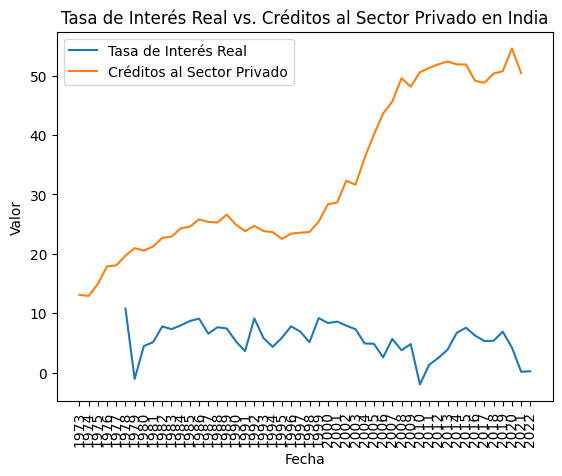

In [17]:
import matplotlib.pyplot as plt

df_india = df[df['country'] == 'India']
tasa_interes_real = df_india['real_interest_rate']
creditos_privados = df_india['credit_to_private_sector']

fig, ax = plt.subplots()
ax.plot(df_india['date'][::-1], tasa_interes_real[::-1], label='Tasa de Interés Real')
ax.plot(df_india['date'][::-1], creditos_privados[::-1], label='Créditos al Sector Privado')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Tasa de Interés Real vs. Créditos al Sector Privado en India')
ax.legend()
plt.xticks(rotation=90)
plt.show()


Tras analizar los datos de la Tasa de Interés Real Anual en India, se puede observar que esta ha oscilado históricamente en un rango de 0 a 10 puntos porcentuales. Sin embargo, se ha observado una disminución significativa desde el inicio de la pandemia, con una tendencia que tiende hacia cero.

Esta disminución en la tasa de interés real puede indicar una política monetaria expansiva implementada para estimular la economía durante la crisis de la pandemia. Una tasa de interés real más baja puede incentivar la inversión y el gasto, lo que potencialmente impulsa el crecimiento económico.

Los datos de los Créditos al Sector Privado en India, se puede observar una tendencia positiva a lo largo de los años. Esta tendencia muestra que la proporción de créditos otorgados al sector privado ha incrementado gradualmente. Este aumento en los créditos al sector privado puede tener implicaciones positivas en el crecimiento y desarrollo económico de las empresas, así como en la generación de empleo.